In [3]:
from schrodinger.application.desmond.packages import traj_util, traj, topo
#from schrodinger.application.desmond.packages import traj_util, traj, topo
import numpy as np
import pandas as pd

import os
cms_path = os.path.expanduser('~/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered-out.cms')
traj_path = os.path.expanduser('~/Dropbox/KcsA/kcsa_5000ns_1218/kcsa_deactivated_5us_centered_trj')

# Load structure and trajectory (paths to your .cms and .trj files)
_, cms_model = topo.read_cms(cms_path)
trajectory = traj.read_traj(traj_path)



In [5]:
# test some codes to extra info of the system
from schrodinger.structure import StructureReader

def extract_chain_residue_info(cms_file):
    """
    Extract chain names and residue numbers from a CMS file.

    Parameters:
    cms_file (str): Path to the CMS file.

    Returns:
    dict: A dictionary with chain names as keys and a list of residue numbers as values.
    """
    chain_residues = {}
    
    # Read the cms_model
    with StructureReader(cms_file) as reader:
        cms_model = next(reader)  # Get the first structure (cms_model)

        # Iterate through residues
        for residue in cms_model.residue:
            chain_name = residue.chain.strip()
            res_num = residue.resnum

            if chain_name not in chain_residues:
                chain_residues[chain_name] = []
            
            chain_residues[chain_name].append(res_num)

    return chain_residues


# the path to your CMS file
info = extract_chain_residue_info(cms_path)

# Print the extracted info
for chain, residues in info.items():
    print(f"Chain {chain}: Residues {residues}")


Chain : Residues [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 1

In [11]:
res_adjust_dict={'A':21, 'B':-82 , 'C':-185, 'D':-288}

def gen_als(res_adjust_dict, resi_st, resi_end, chain, sele_atom):
    """
    generate als for atom select with res num correction

    Parameters:
    res_adjust_dict (dict): dict used to correct res num based on chain name
    resi_st: start residue num
    resi_end: end residue num
    chain (str): chain name
    sele_atom (str): atom type name like C, N, O

    Returns:
    str: asl used for atom selection
    """
    
    start_res = resi_st - res_adjust_dict[chain]
    end_res = resi_end - res_adjust_dict[chain]
    if sele_atom =='C':
        asl = f"(chain.name {chain}) and res.num {start_res}-{end_res} and atom.ptype C "
    elif sele_atom =='N':
        asl = f"(chain.name {chain}) and res.num {start_res}-{end_res} and atom.ptype N "
    elif sele_atom =='O':
        asl = f"(chain.name {chain}) and res.num {start_res}-{end_res} and atom.ptype O "
        
    
    return asl


c_als = gen_als(res_adjust_dict, 74, 80, 'B', 'N')
print(c_als)

(chain.name B) and res.num 156-162 and atom.ptype N 


In [12]:
# test gel_als func
test_aids = cms_model.select_atom(c_als)
print(test_aids)

[1911, 1918, 1925, 1932, 1936, 1948, 1952]


In [19]:
# Select backbone atoms: carbonyl carbon (C), oxygen (O), and amide nitrogen (N)
aids_dic={}
gids_dic={}

for chain in ['A', 'B', 'C','D']:
    for atom in ['C','O','N']:
        als = gen_als(res_adjust_dict, 74, 80, chain , atom)
        label=chain + 'atom'+ atom
        aids_dic[label]=cms_model.select_atom(als)
    
        # Map atom IDs to global IDs for trajectory processing  
        gids_dic[label]=topo.aids2gids(cms_model, aids_dic[label])
    
    
##
    #gid_O_list = topo.aids2gids(cms_model, aisd_dic[f'{chain}atomO'])
    #gid_N_list = topo.aids2gids(cms_model, aisd_dic[f'{chain}atomN']

    
print( aids_dic.keys())

dict_keys(['AatomC', 'AatomO', 'AatomN', 'BatomC', 'BatomO', 'BatomN', 'CatomC', 'CatomO', 'CatomN', 'DatomC', 'DatomO', 'DatomN'])


In [29]:
import numpy as np

# Initialize dictionaries to accumulate orientation vectors per chain
sigma_33_dict = {chain: [] for chain in ['A', 'B', 'C', 'D']}
sigma_22_dict = {chain: [] for chain in ['A', 'B', 'C', 'D']}
sigma_11_dict = {chain: [] for chain in ['A', 'B', 'C', 'D']}

# Loop through trajectory frames
for frame in trajectory:
    for chain in ['A', 'B', 'C', 'D']:
        # Ensure the lists are of equal length (one-to-one correspondence)
        assert len(gids_dic[f'{chain}atomC']) == len(gids_dic[f'{chain}atomN']) == len(gids_dic[f'{chain}atomO']), "Mismatch in atom selections."

        # Temporary storage for the current frame's orientations for this chain
        sigma_33_frame = []
        sigma_22_frame = []
        sigma_11_frame = []

        # Process each residue (assume one-to-one correspondence of C, O, N per residue)
        for gid_C, gid_O, gid_N in zip(gids_dic[f'{chain}atomC'], gids_dic[f'{chain}atomO'], gids_dic[f'{chain}atomN']):
            # Extract atomic positions
            C = frame.pos(gid_C)
            O = frame.pos(gid_O)
            N = frame.pos(gid_N)

            # Build local molecular frame
            vec_CO = O - C
            sigma_22 = vec_CO / np.linalg.norm(vec_CO)  # Along CO bond

            # Normal vector to peptide plane (C', O, N)
            vec_CN = N - C
            sigma_33 = np.cross(vec_CO, vec_CN)  # Perpendicular to peptide plane
            sigma_33 /= np.linalg.norm(sigma_33)

            # Orthogonal axis
            sigma_11 = np.cross(sigma_33, sigma_22)  # Orthogonal to sigma_33 and sigma_22
            sigma_11 /= np.linalg.norm(sigma_11)

            # Append to temporary storage
            sigma_33_frame.append(sigma_33)
            sigma_22_frame.append(sigma_22)
            sigma_11_frame.append(sigma_11)

        # Append the current frame's orientations for this chain
        sigma_33_dict[chain].append(sigma_33_frame)
        sigma_22_dict[chain].append(sigma_22_frame)
        sigma_11_dict[chain].append(sigma_11_frame)

# Convert lists of frames into numpy arrays for each chain
for chain in ['A', 'B', 'C', 'D']:
    sigma_33_dict[chain] = np.array(sigma_33_dict[chain])
    sigma_22_dict[chain] = np.array(sigma_22_dict[chain])
    sigma_11_dict[chain] = np.array(sigma_11_dict[chain])



In [31]:
print(sigma_33_dict['A'].shape)
# save data
np.savez(
    "kcsa_5us_sigma_orientations.npz",
    sigma_33=sigma_33_dict,
    sigma_22=sigma_22_dict,
    sigma_11=sigma_11_dict
)

(40001, 7, 3)


In [4]:
# reload data
data = np.load("kcsa_5us_sigma_orientations.npz", allow_pickle=True)
sigma_33_dict = data['sigma_33'].item()  # Use `.item()` to extract the dictionary
sigma_22_dict = data['sigma_22'].item()
sigma_11_dict = data['sigma_11'].item()

In [5]:
# from the local frame, we can calculate the rotation matrix from local frame to lab frame
sigma11= 240   #
sigma22= 190   # y
sigma33= 95

csa_principle=np.array([[240,0, 0],[0,190,0],[0,0,95]])
#print(sigma_33_array.shape)
print(sigma_33_dict['A'][0][1])  # chain, frame, residue_num, 3
print(sigma_22_dict['A'][0][1])
print(sigma_11_dict['A'][0][1])

# Initialize csa_t as an empty dictionary
csa_t = {}
ori_t ={}
ori_t_T= {} # transpose

# Combine sigma arrays for each chain
for chain in ['A', 'B', 'C', 'D']:
    # Stack the sigma arrays along the last axis
    ori_t[chain] = np.stack(
        (sigma_33_dict[chain], sigma_22_dict[chain], sigma_11_dict[chain]),
        axis=-1
    )  # frame, resi_num, 3, 3
    ori_t_T[chain]=np.transpose(ori_t[chain], axes=(0, 1, 3, 2)) 
    #print(f"Shape of ori_t[{chain}]: {ori_t[chain].shape}")
    #print(f"Shape of csa_principle: {csa_principle.shape}")
    #print(f"Shape of ori_t_T[{chain}]: {ori_t_T[chain].shape}")

    # now calculat sigma(t)
    csa_t[chain]= np.einsum('mnij,jk,mnkl->mnil', ori_t[chain], csa_principle, ori_t_T[chain])

[ 0.4107936   0.66596377 -0.62268835]
[ 0.9099784 -0.2571888  0.3252588]
[ 0.0564621 -0.7002472 -0.7116642]


In [40]:
# visualize csa_t[:,:,2,2] 
import matplotlib.pyplot as plt
import numpy as np

def visualize_csa_t(csa_t, chain, residues, title="CSA Visualization", save_as=None):
    """
    Visualize `csa_t[:, :, 2, 2]` for specific residues over time.

    Parameters:
        csa_t (dict): Dictionary with chains as keys and 4D numpy arrays as values.
        chain (str): Chain to visualize (e.g., 'A', 'B', etc.).
        residues (list): List of residue indices to plot (0-indexed).
        title (str): Title of the plot.
        save_as (str): If provided, save the plot to this filename.
    """
    # Check if the chain exists in the dictionary
    if chain not in csa_t:
        raise ValueError(f"Chain '{chain}' not found in csa_t.")
    
    # Extract `csa_t[:, :, 2, 2]` for the given chain
    data = csa_t[chain][:, :, 2, 2]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for residue in residues:
        if residue >= data.shape[1]:
            raise ValueError(f"Residue index {residue} out of bounds for chain '{chain}'.")
        plt.plot(data[:, residue], label=f"Residue {residue + 74}")
    
    # Customize the plot
    plt.xlabel("Frame")
    plt.ylabel("CSA (2, 2) Component")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Show or save the plot
    if save_as:
        plt.savefig(save_as, dpi=300)
        print(f"Plot saved as {save_as}")
    else:
        plt.show()

# Example usage
# Assuming `csa_t` is the dictionary with CSA data
residues_to_plot = np.array([74, 75, 76, 77, 78, 79]) - 74 # Replace with desired residue indices
visualize_csa_t(csa_t, chain='A', residues=residues_to_plot, title="CSA for Chain A Residues")


Plot saved as KcsA_5us_chainA_sigma33_trajacotry.png


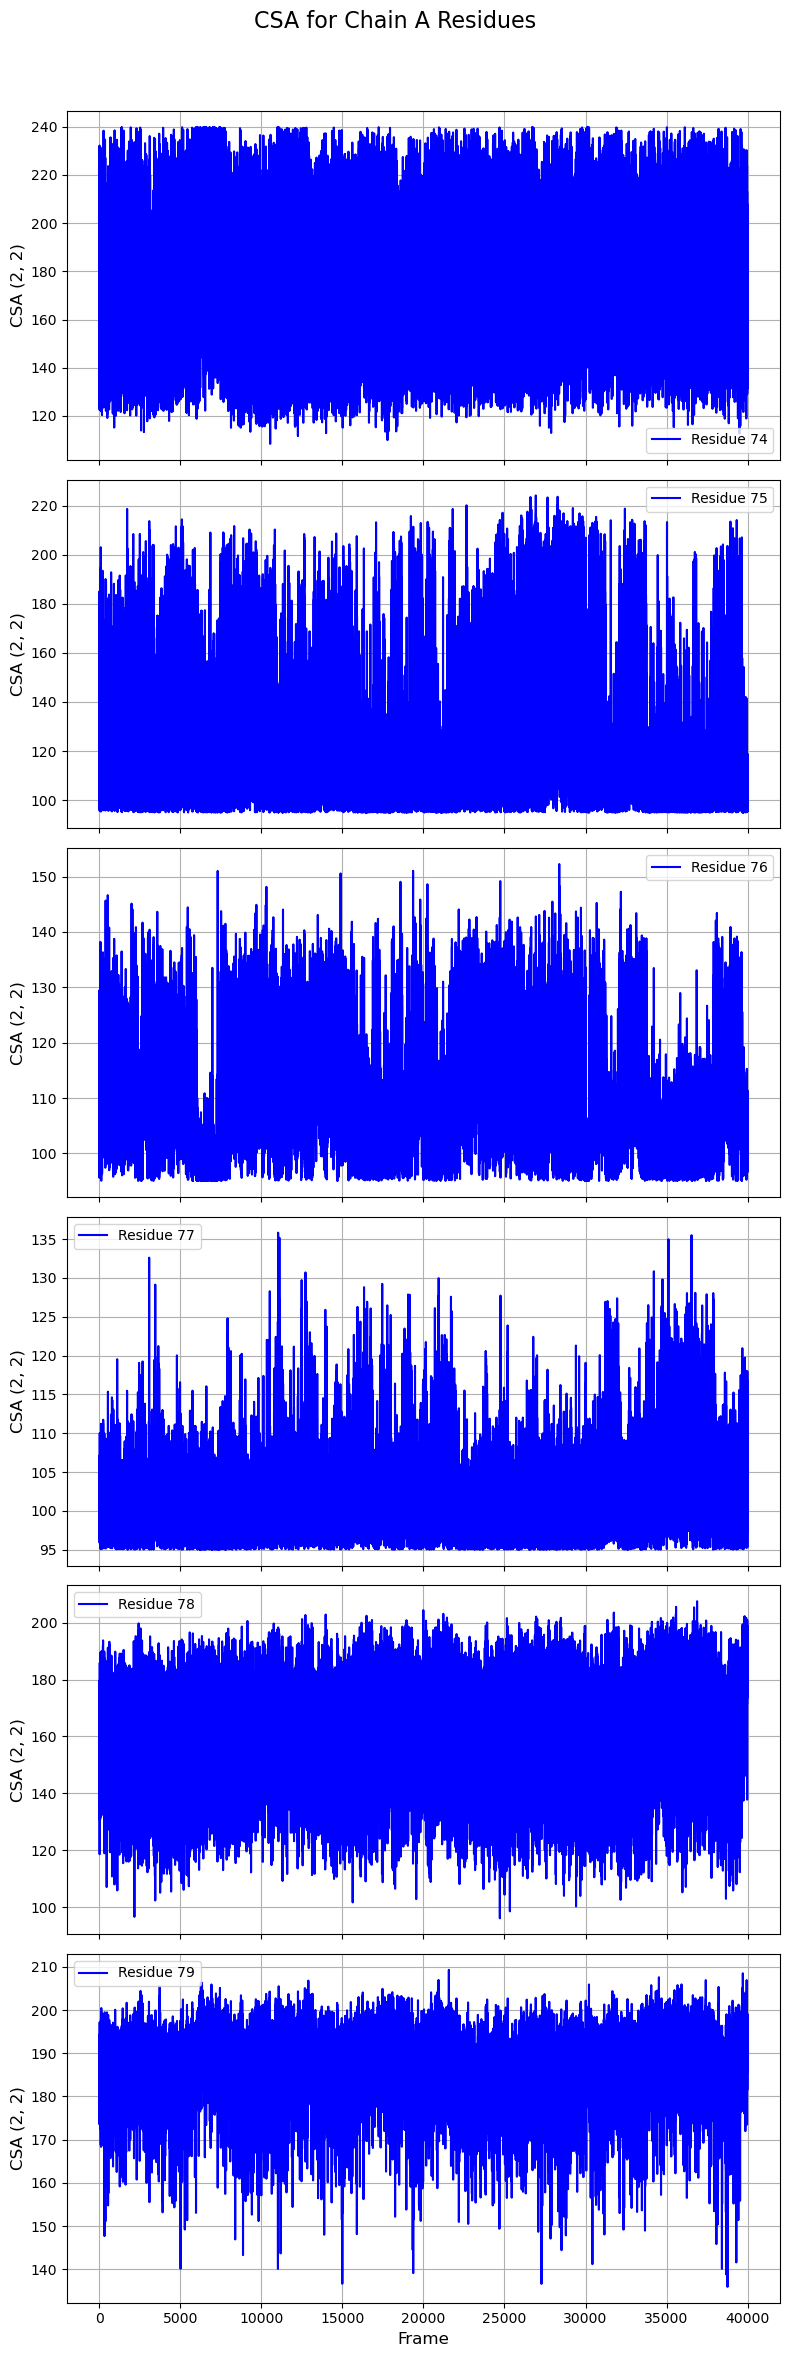

In [44]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def visualize_csa_t_subplots(csa_t, chain, residues, title="CSA Visualization", save_as=None):
    """
    Visualize `csa_t[:, :, 2, 2]` for specific residues over time, with each residue in a separate subplot.

    Parameters:
        csa_t (dict): Dictionary with chains as keys and 4D numpy arrays as values.
        chain (str): Chain to visualize (e.g., 'A', 'B', etc.).
        residues (list): List of residue indices to plot (0-indexed).
        title (str): Title of the overall plot.
        save_as (str): If provided, save the plot to this filename.
    """
    # Check if the chain exists in the dictionary
    if chain not in csa_t:
        raise ValueError(f"Chain '{chain}' not found in csa_t.")
    
    # Extract `csa_t[:, :, 2, 2]` for the given chain
    data = csa_t[chain][:, :, 2, 2]
    
    # Setup subplots
    num_residues = len(residues)
    fig, axes = plt.subplots(num_residues, 1, figsize=(8, 4 * num_residues), sharex=True)
    fig.suptitle(title, fontsize=16)
    
    # Ensure axes is iterable for a single subplot case
    if num_residues == 1:
        axes = [axes]
    
    # Plot each residue in its own subplot
    for ax, residue in zip(axes, residues):
        if residue >= data.shape[1]:
            raise ValueError(f"Residue index {residue} out of bounds for chain '{chain}'.")
        ax.plot(data[:, residue], label=f"Residue {residue + 74}", color='blue')
        ax.set_ylabel("CSA (2, 2)", fontsize=12)
        ax.legend()
        ax.grid(True)

    # Customize the x-axis for the bottom plot
    axes[-1].set_xlabel("Frame", fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Show or save the plot
    if save_as:
        plt.savefig(save_as, dpi=300)
        print(f"Plot saved as {save_as}")
    else:
        plt.show()

# Example usage
residues_to_plot = np.array([74, 75, 76, 77, 78, 79]) - 74  # Convert to 0-based indices
visualize_csa_t_subplots(csa_t, chain='A', residues=residues_to_plot, title="CSA for Chain A Residues", save_as='KcsA_5us_chainA_sigma33_trajacotry.png')


Plot saved as KcsA_5us_chainA_sigma33_trajacotry.png
Plot saved as KcsA_5us_chainB_sigma33_trajacotry.png
Plot saved as KcsA_5us_chainC_sigma33_trajacotry.png
Plot saved as KcsA_5us_chainD_sigma33_trajacotry.png


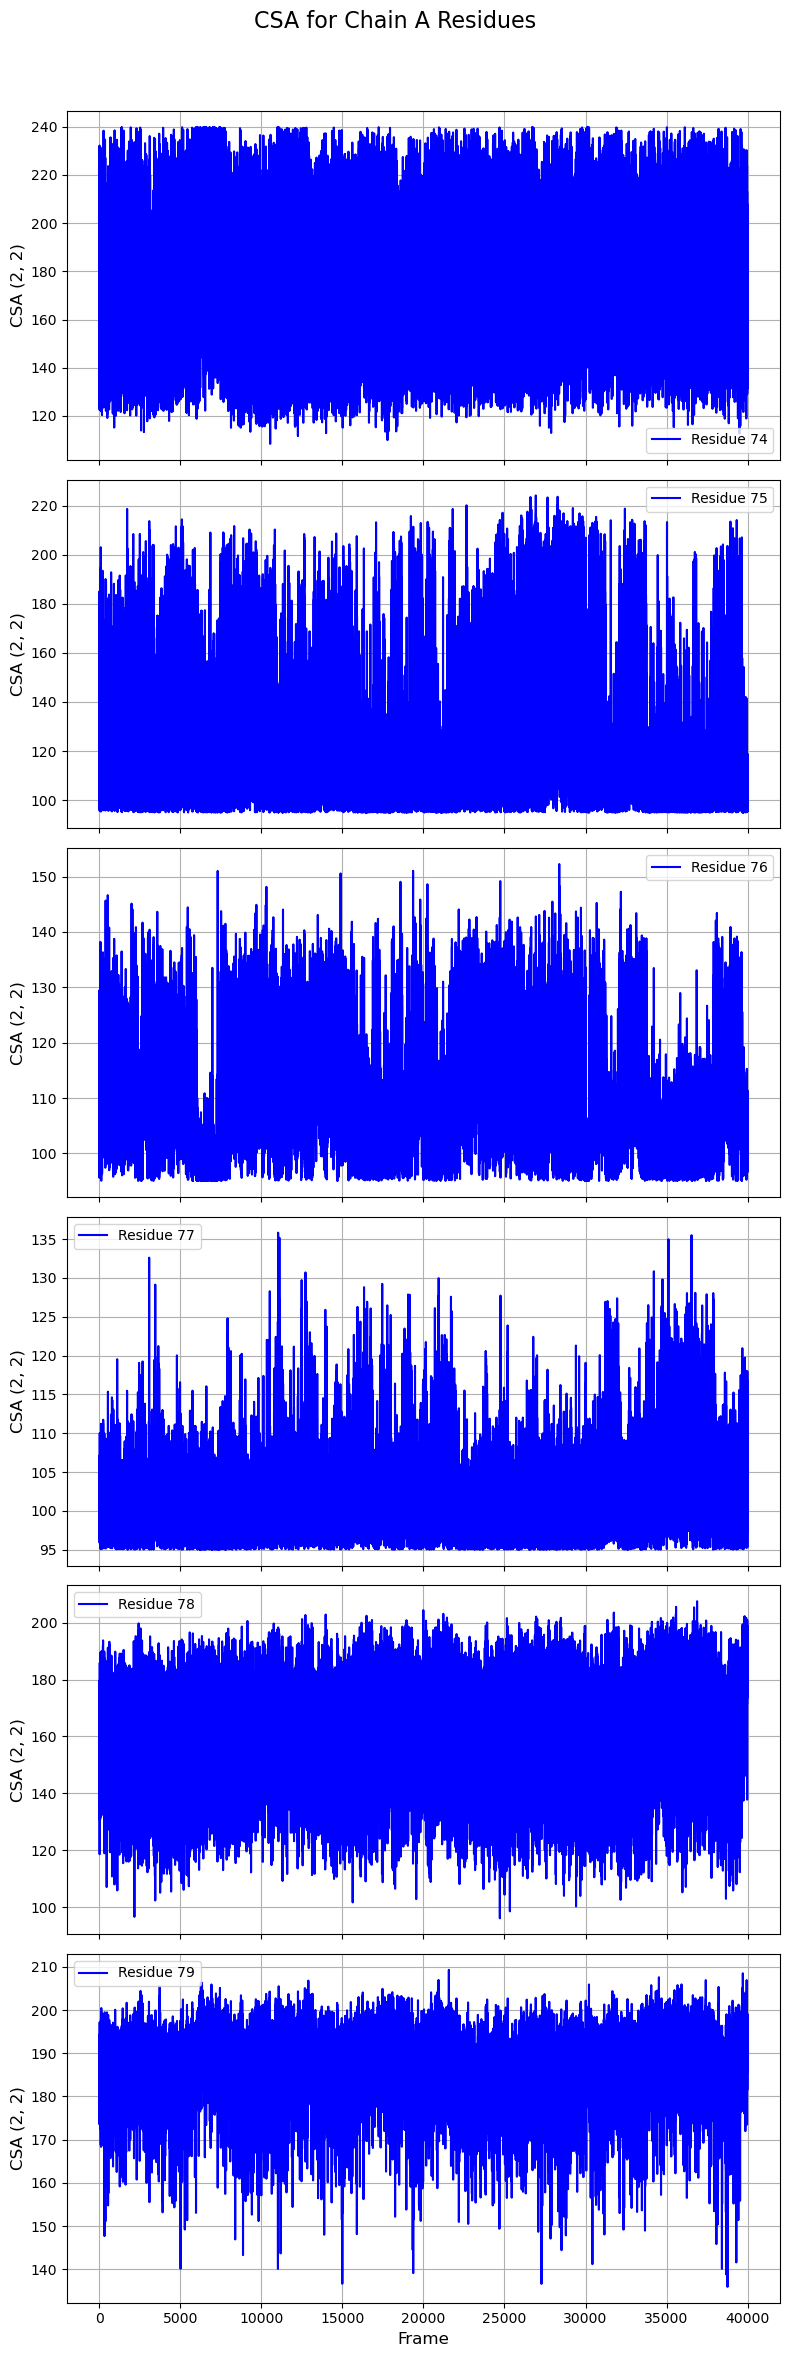

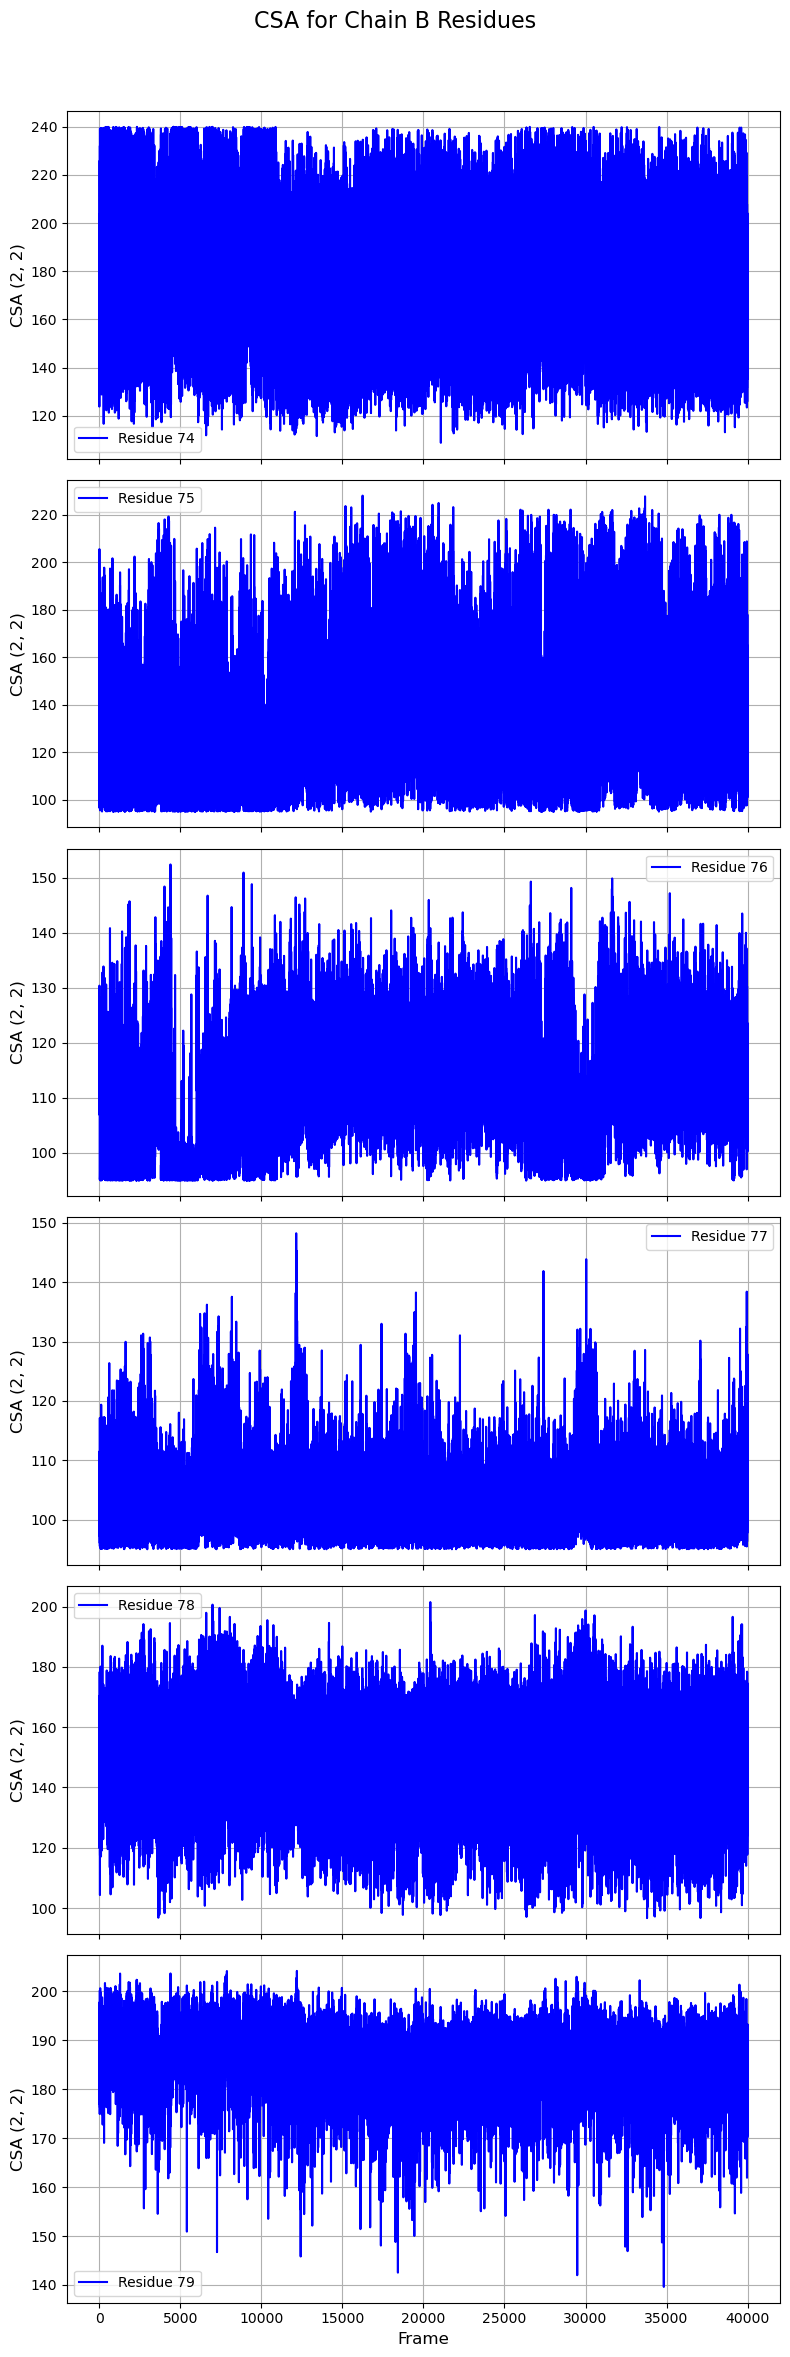

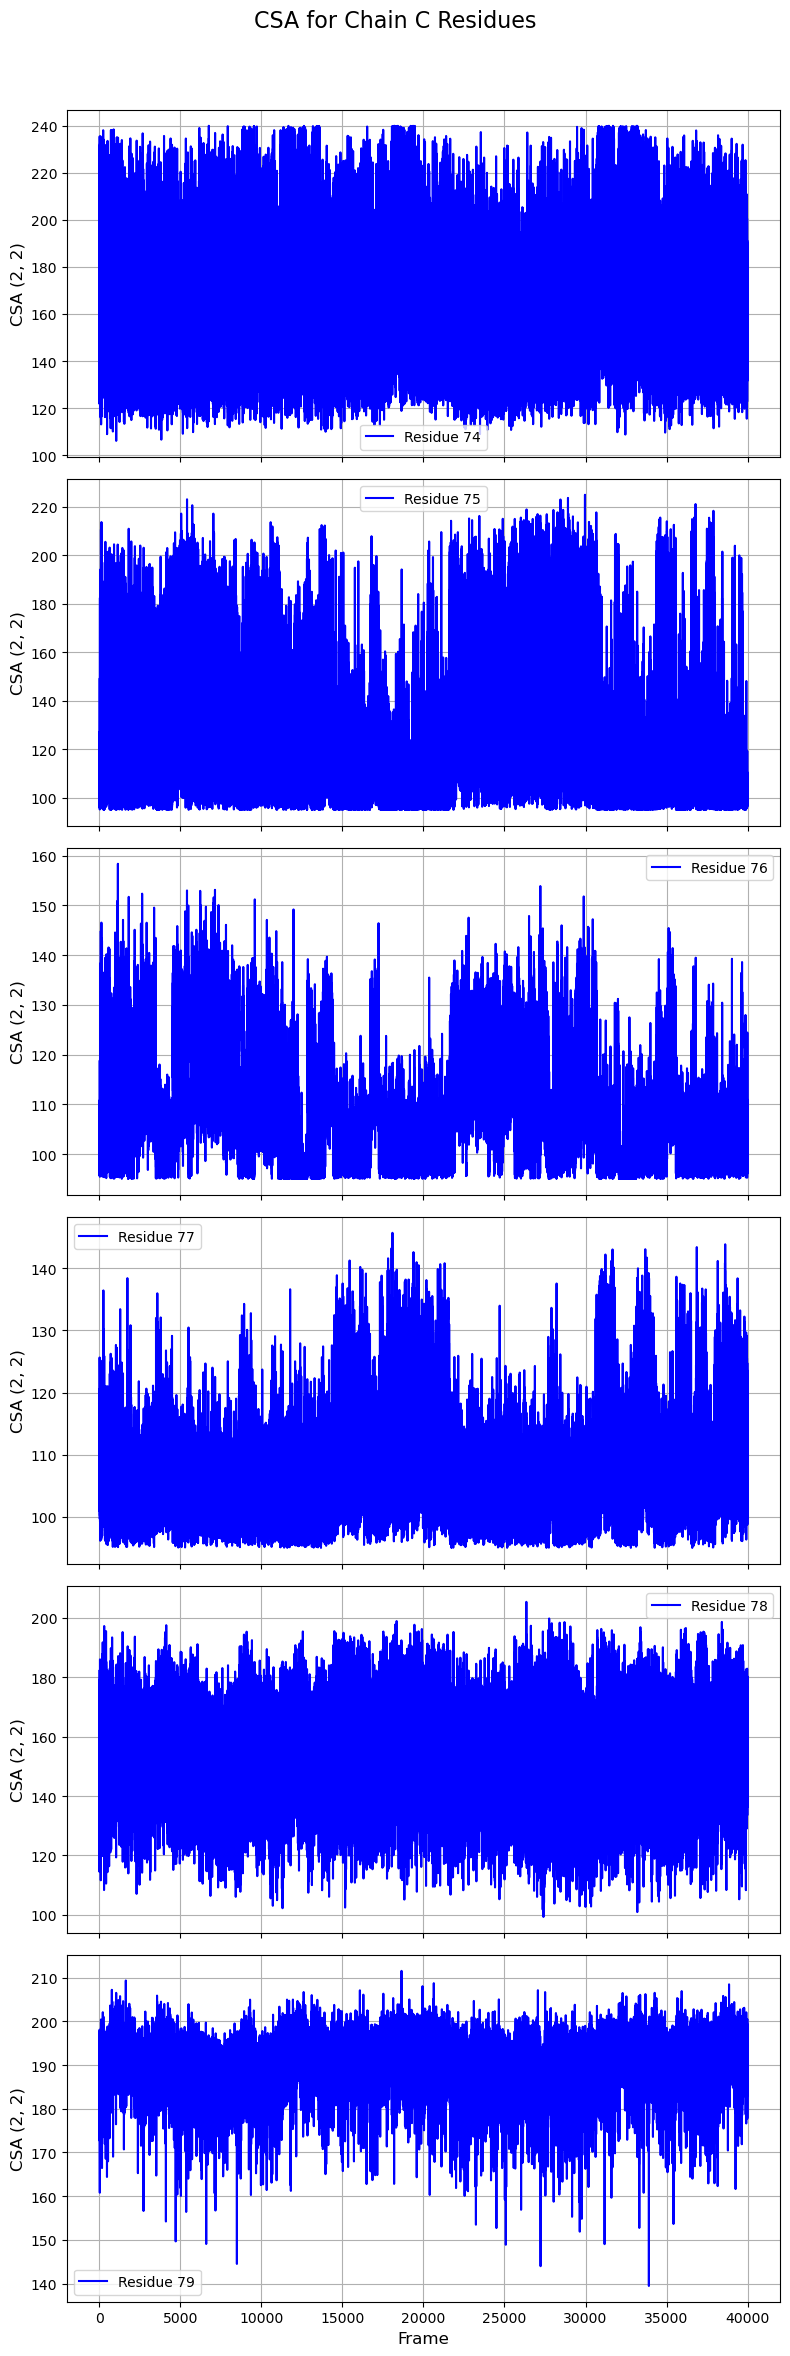

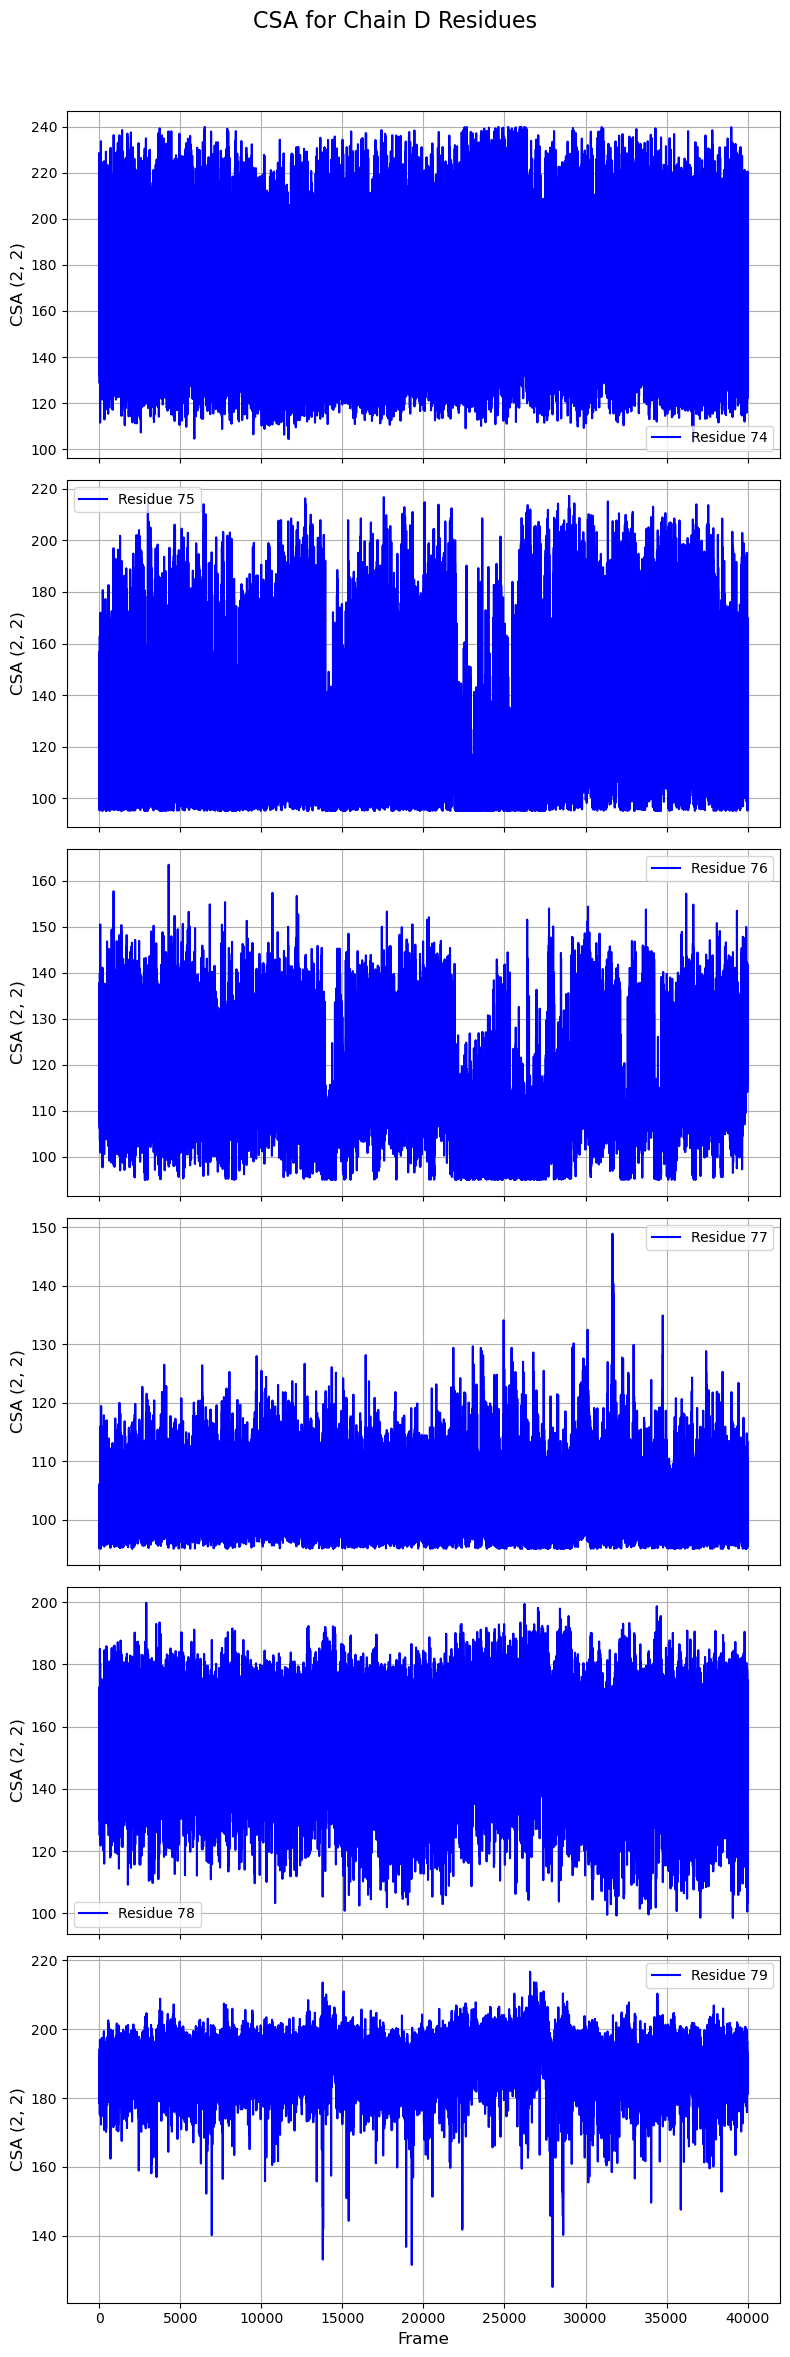

In [45]:
for chain in ['A', 'B', 'C', 'D']:
    visualize_csa_t_subplots(csa_t, chain=f'{chain}', residues=residues_to_plot, title=f"CSA for Chain {chain} Residues",save_as=f'KcsA_5us_chain{chain}_sigma33_trajacotry.png')



In [6]:
# convert to eular angle

from scipy.spatial.transform import Rotation as R
import numpy as np

def calculate_euler_angles(ori_t, convention='ZYZ'):
    """
    Calculate Euler angles from orientation matrices.

    Parameters:
        ori_t (np.ndarray): Orientation matrices, shape (num_frames, num_residues, 3, 3).
        convention (str): Euler angle convention, e.g., 'ZYX', 'ZXZ', etc.

    Returns:
        np.ndarray: Euler angles, shape (num_frames, num_residues, 3) for yaw, pitch, roll.
    """
    num_frames, num_residues = ori_t.shape[:2]
    euler_angles = np.zeros((num_frames, num_residues, 3))
    
    for frame in range(num_frames):
        for residue in range(num_residues):
            # Extract the 3x3 rotation matrix for this frame and residue
            rotation_matrix = ori_t[frame, residue]
            # Convert to Euler angles
            euler_angles[frame, residue] = R.from_matrix(rotation_matrix).as_euler(convention, degrees=True)
    
    return euler_angles




In [7]:
import numpy as np

# Example usage
# ori_t is assumed to be a dictionary with chains as keys and 4D numpy arrays as values
# Here, ori_t['A'] is a 4D numpy array with shape (num_frames, num_residues, 3, 3)
euler_angles = calculate_euler_angles(ori_t['A'], convention='ZYZ')
# Now, euler_angles has shape (num_frames, num_residues, 3)
# Each element euler_angles[frame, residue] contains [alpha, beta, gamma] for that frame and residue.

# Test the intuition that beta corresponds to the angle between ori_t['A'][:, :, :, 2] and [0, 0, 1]
# Specifically, ori_t['A'][:, :, 1, 2] should equal np.cos(beta)

# Compute cosine of beta
calculated_cos_beta = np.cos(np.radians(euler_angles[:, :, 1]))

# Extract ori_t['A'][:, :, 1, 2] (dot product of ori_t['A'][:, :, 1, :] with [0, 0, 1])
expected_cos_beta = ori_t['A'][:, :, 2, 2]

# Use np.allclose to check the equality within a tolerance
if np.allclose(calculated_cos_beta, expected_cos_beta, atol=1e-6):
    print("The intuition holds: beta angle corresponds to the angle with the Z-axis.")
else:
    print("The intuition does not hold, or there is a numerical discrepancy.")

# Optionally, debug differences
differences = calculated_cos_beta - expected_cos_beta
print(f"Max difference: {np.max(np.abs(differences))}")



The intuition holds: beta angle corresponds to the angle with the Z-axis.
Max difference: 1.2840384822077056e-07


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def autocorrelation_sphere20(euler_angles, chain):
    """
    Calculate the autocorrelation function for the Y2,0 component of CSA interactions,
    computed individually for each residue.

    Parameters:
    -----------
    euler_angles : dict
        Dictionary with chain IDs as keys and 3D numpy arrays as values.
        Each array has shape (num_frames, num_residues, 3), where the last
        dimension contains [yaw, pitch, roll] angles in degrees.
    chain : str
        Chain ID to process (e.g., 'A', 'B', etc.).

    Returns:
    --------
    acf : numpy.ndarray
        Autocorrelation function for the Y2,0 component, with shape (num_frames - 1, num_residues).
    """
    if chain not in euler_angles:
        raise ValueError(f"Chain '{chain}' not found in euler_angles.")

    # Extract pitch angle (beta) and calculate Y2,0 component
    beta = np.radians(euler_angles[chain][:, :, 1])  # Convert to radians
    cos_beta = np.cos(beta)  # Cosine of beta
    cos2 = cos_beta**2  # Squared cosine of beta
    A = (3 * cos2 - 1) / 2.0  # Y2,0 CSA interaction, shape: (num_frames, num_residues)

    # Calculate mean over frames for each residue
    A_mean = np.mean(A, axis=0, keepdims=True)  # Shape: (1, num_residues)

    # Number of frames and residues
    num_frames, num_residues = A.shape

    # Preallocate autocorrelation array
    acf = np.zeros((num_frames - 1, num_residues))

    # Calculate ACF
    for k in range(1, num_frames):  # Skip k=0 (full overlap)
        # Mean-subtracted product for each residue
        overlap = num_frames - k  # Overlapping frames
        acf[k - 1] = np.sum(
            (A[:-k] - A_mean) * (A[k:] - A_mean), axis=0
        ) / overlap

    # Normalize by variance for each residue
    variance = np.var(A, axis=0, keepdims=True)  # Shape: (1, num_residues)
    acf /= variance

    return acf


In [11]:
# calcualte acf for symmetric part
euler_angles={}
for chain in ['A','B','C','D']:
    euler_angles[chain] = calculate_euler_angles(ori_t[chain], convention='ZYZ')
    
acf_sym_A = autocorrelation_sphere20(euler_angles, 'A')
print(acf_sym_A.shape)

(40000, 7)


In [57]:
# visualization
def visualize_autocorrelation(acf, residues, title="autocorrelation Visualization", save_as=None):
    """
    Visualize `csa_t[:, :, 2, 2]` for specific residues over time, with each residue in a separate subplot.

    Parameters:
        acf (array): numpy array with dim [num_frame-1, num_residue].
        chain (str): Chain to visualize (e.g., 'A', 'B', etc.).
        residues (list): List of residue indices to plot (0-indexed).
        title (str): Title of the overall plot.
        save_as (str): If provided, save the plot to this filename.
    """
    # Check if the chain exists in the dictionary
#     if chain not in :
#         raise ValueError(f"Chain '{chain}' not found in csa_t.")
    
    # Extract `csa_t[:, :, 2, 2]` for the given chain
    data = acf
    time = range(acf.shape[0])    # 4us in 100ps
    # Setup subplots
    num_residues = len(residues)
    fig, axes = plt.subplots(num_residues, 1, figsize=(8, 4 * num_residues), sharex=True)
    fig.suptitle(title, fontsize=16)
    
    # Ensure axes is iterable for a single subplot case
    if num_residues == 1:
        axes = [axes]
    
    # Plot each residue in its own subplot
    for ax, residue in zip(axes, residues):
        if residue >= data.shape[1]:
            raise ValueError(f"Residue index {residue} out of bounds for chain '{chain}'.")
        ax.plot(data[:, residue], label=f"Residue {residue + 74}", color='blue')
        ax.set_ylabel("Autocorrelation", fontsize=12)
        ax.legend()
        ax.grid(True)

    # Customize the x-axis for the bottom plot
    axes[-1].set_xlabel("time/100ps", fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Show or save the plot
    if save_as:
        plt.savefig(save_as, dpi=300)
        print(f"Plot saved as {save_as}")
    else:
        plt.show()

Plot saved as sym_autocorrelation_chainA_4usKcsAmd.png


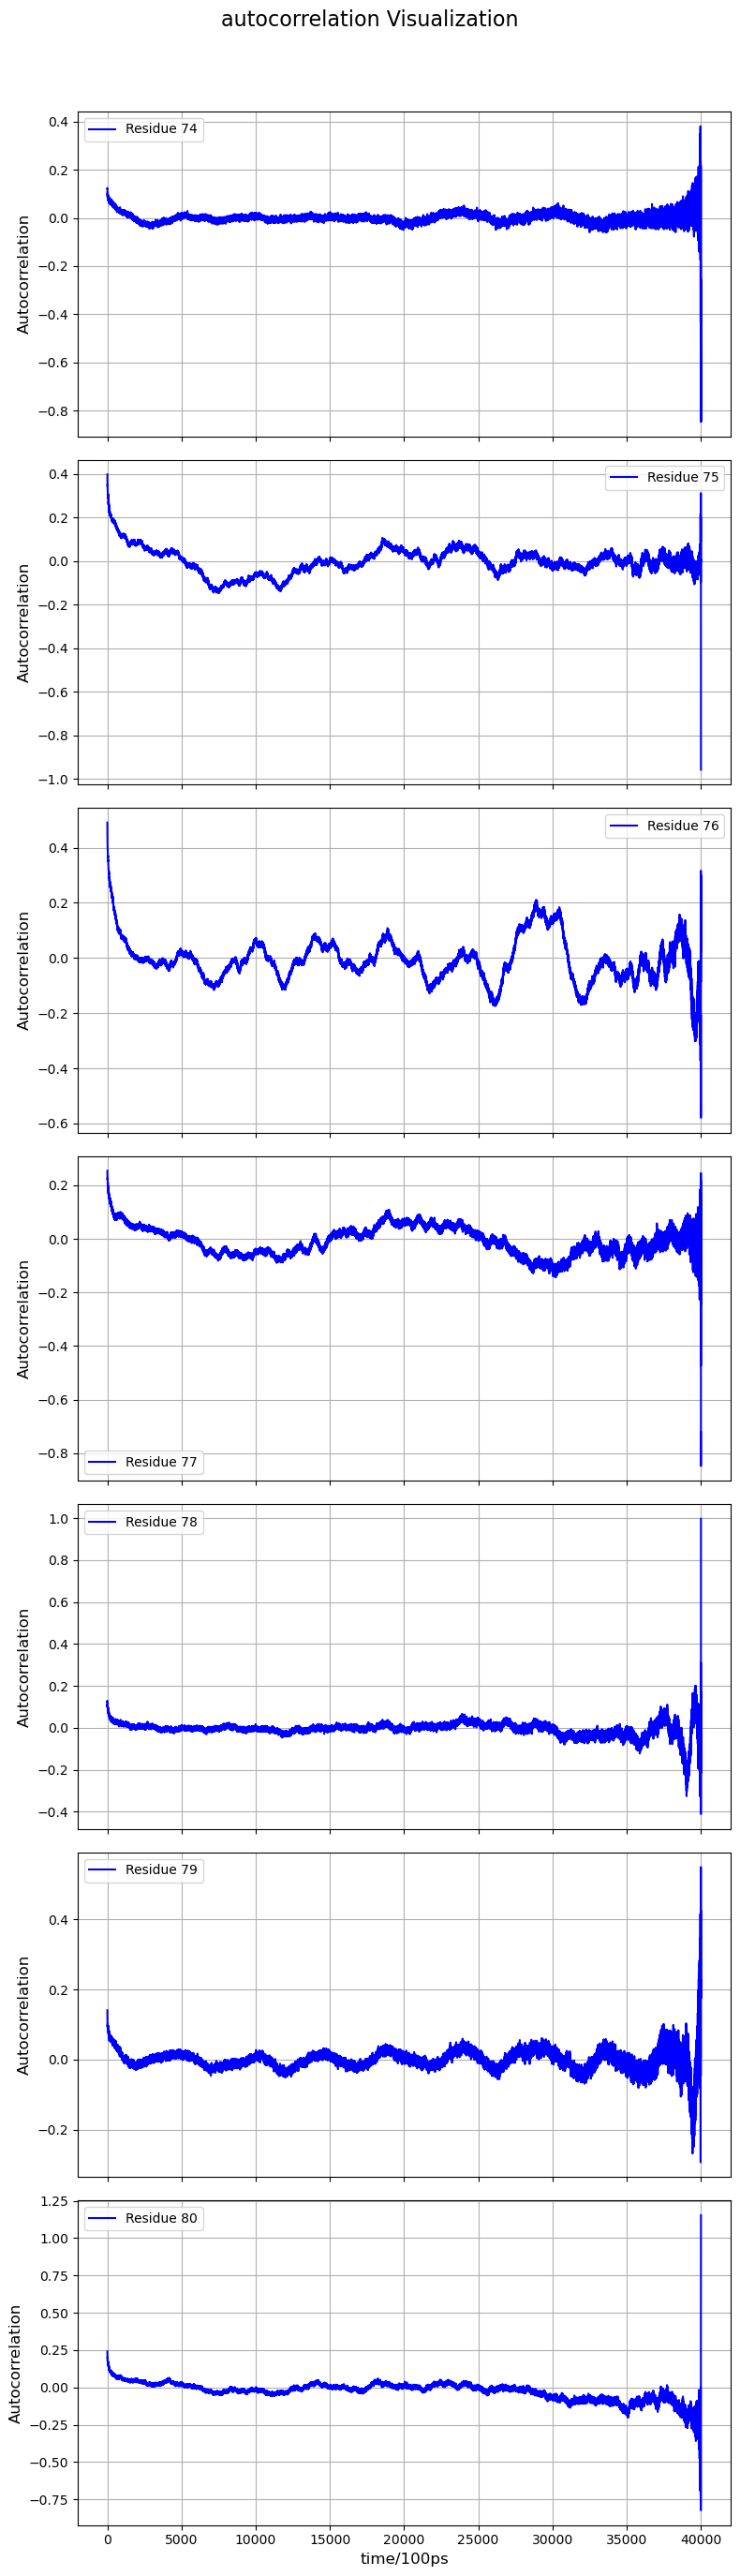

In [58]:
residues=range(7)
visualize_autocorrelation(acf_sym_A,residues,save_as='sym_autocorrelation_chainA_4usKcsAmd.png' )

In [47]:
# calcualte the spectrum density and visualize them

import numpy as np

def spectral_density(acf, time_step):
    """
    Calculate the spectral density from the autocorrelation function.

    Parameters:
    -----------
    acf : numpy.ndarray
        Autocorrelation function with shape (num_lags, num_residues).
    time_step : float
        Time interval between frames in the same units as desired frequency.

    Returns:
    --------
    frequencies : numpy.ndarray
        Array of frequencies corresponding to the spectral density.
    spectral_density : numpy.ndarray
        Spectral density with shape (num_frequencies, num_residues).
    """
    # Number of lags (time steps) and residues
    num_lags, num_residues = acf.shape

    # Apply a window function to reduce spectral leakage (optional, Hann window)
    window = np.hanning(num_lags)
    acf_windowed = acf * window[:, np.newaxis]

    # Fourier transform of the autocorrelation function
    fft_result = np.fft.rfft(acf_windowed, axis=0)

    # Convert to spectral density (real part only, multiplied by time_step for scaling)
    spectral_density = 2 * time_step * np.abs(fft_result)

    # Frequency axis for the Fourier transform
    frequencies = np.fft.rfftfreq(num_lags, d=time_step)

    return frequencies, spectral_density



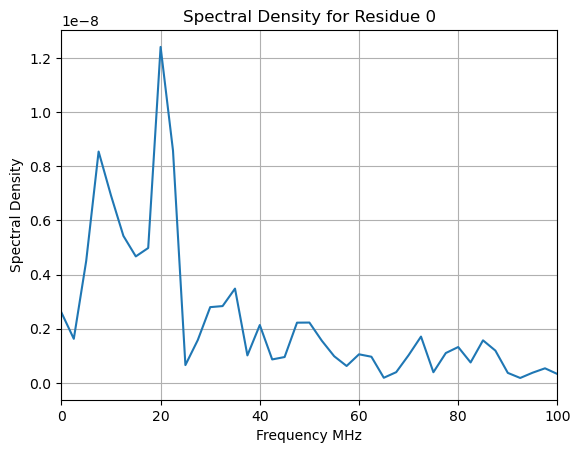

In [48]:
# Time step between frames
time_step = 0.1  # For example, 0.1 ns/100 ps

# 1/ temp_step = 10*10**9 hz =

# Calculate spectral density
frequencies, spectrum = spectral_density(acf_sym_A, time_step)

# convert frequencies to MHz 10**10*10**(-6)

frequencies= frequencies*10**4

# convert spectrum to s from 0.1 ns
spectrum = spectrum*10**(-10)

# Plot the spectral density for the first residue
import matplotlib.pyplot as plt

plt.plot(frequencies, spectrum[:, 2])
plt.xlim([0,100])
plt.xlabel('Frequency MHz')
plt.ylabel('Spectral Density')
plt.title('Spectral Density for Residue 0')
plt.grid()
plt.show()

In [60]:
def visualize_spectrumdensity(acf, residues, time_step, title="spectrum density Visualization", save_as=None):
    """
    Visualize spectrum density with each residue in a separate subplot.

    Parameters:
        acf (array): numpy array with dim [num_frame-1, num_residue].
        #chain (str): Chain to visualize (e.g., 'A', 'B', etc.).
        residues (list): List of residue indices to plot (0-indexed).
        time_step (float): time interval between each frames in ns
        title (str): Title of the overall plot.
        save_as (str): If provided, save the plot to this filename.
    """

    
    time_step = 0.1  # For example, 0.1 ns/100 ps

    # 1/ temp_step = 10*10**9 hz =

    # Calculate spectral density
    frequencies, spectrum = spectral_density(acf, time_step)

    # convert frequencies to MHz 10**10*10**(-6)

    frequencies= frequencies*10**4
    
    num_residues = len(residues)
    fig, axes = plt.subplots(num_residues, 1, figsize=(8, 4 * num_residues), sharex=True)
    fig.suptitle(title, fontsize=16)
    
    # Ensure axes is iterable for a single subplot case
    if num_residues == 1:
        axes = [axes]
        
    data =spectrum*10**(-10)
    
    # Plot each residue in its own subplot
    for ax, residue in zip(axes, residues):
        if residue >= data.shape[1]:
            raise ValueError(f"Residue index {residue} out of bounds for chain '{chain}'.")
        ax.plot(data[:, residue], label=f"Residue {residue + 74}", color='blue')
        ax.set_ylabel('Spectral Density', fontsize=12)
        #ax.set_xlabel('Frequency MHz', fontsize=12)
        #ax.set_xlim([0,600])
        ax.set_xscale('log')  # Set x-axis to logarithmic scale
        ax.legend()
        ax.grid(True)

    # Customize the x-axis for the bottom plot
    axes[-1].set_xlabel('Frequency MHz', fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Show or save the plot
    if save_as:
        plt.savefig(save_as, dpi=300)
        print(f"Plot saved as {save_as}")
    else:
        plt.show()

Plot saved as Spectrum_density_KscA5us_chainAresi7480


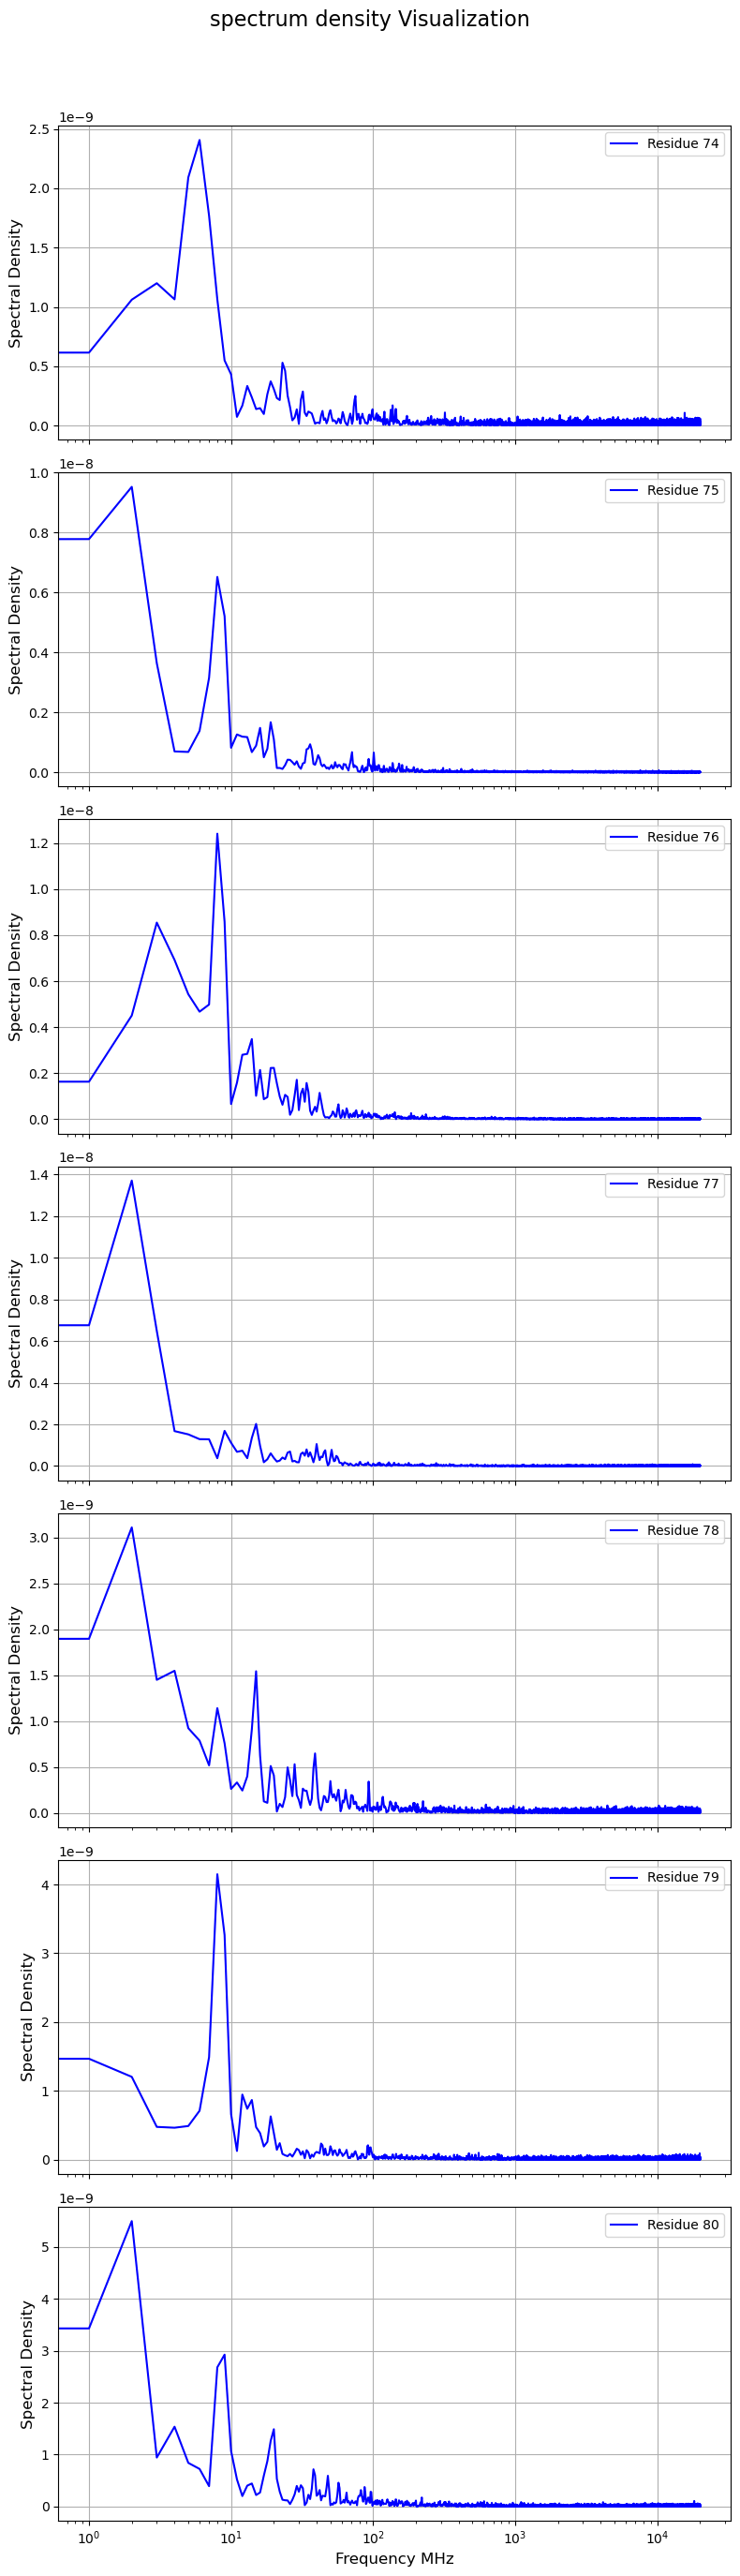

In [61]:
visualize_spectrumdensity(acf_sym_A,range(7),time_step=0.1,save_as='Spectrum_density_KscA5us_chainAresi7480')

[1.31079590e-09 5.19211964e-09 1.04060124e-08 4.74602828e-09
 2.89871130e-10 8.03684334e-11 1.67120942e-08]
[ 0.78174279  0.19735779  0.09847242  0.21590795  3.53503724 12.75009598
  0.06131519]


Text(0, 0.5, 'T1 value/s')

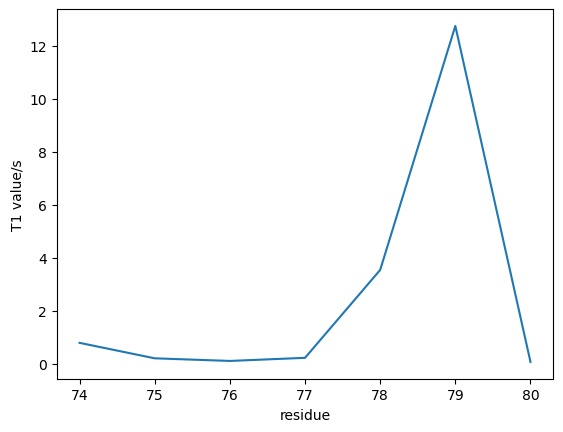

In [69]:
# fit the correlation time with model c(t)= 
# to calculate NMR relaxation parameters, we have equation:
import numpy as np


def calculate_Jomega(freq, spectrum, omega):
    """
    Calculate the spectral density J(omega) for a given angular frequency.

    Parameters:
        freq (numpy array): Array of frequencies corresponding to the spectral density.
        spectrum (numpy array): Array of spectral density values for the frequencies.
        omega (float): Angular frequency (rad/s) for which J(omega) is to be calculated.

    Returns:
        float: The spectral density value J(omega) at the given angular frequency.
    """
    # Find the index where freq is closest to omega
    index = (np.abs(freq - omega)).argmin()
    
    # Return the spectral density at the corresponding index
    return spectrum[index]

def calculate_T1(spectrum_density, gamma13=2 * np.pi * 10.705e6, B0=14.1, 
                 sigma11=240, sigma22=190, sigma33=95):
    """
    Calculate NMR T1 relaxation time using spectral density.

    Parameters:
        spectrum_density (float): Spectral density \( J(\omega_0) \) in rad/s.
        gamma13 (float): Gyromagnetic ratio of 13C (default \( 2 \pi \times 10.705 \times 10^6 \)).
        B0 (float): Magnetic field strength in T (default 14.1 T for 600 MHz).
        sigma11 (float): Anisotropy value for \( \sigma_{11} \) in ppm.
        sigma22 (float): Anisotropy value for \( \sigma_{22} \) in ppm (default 190 ppm).
        sigma33 (float): Anisotropy value for \( \sigma_{33} \) in ppm (default 95 ppm).

    Returns:
        float: Calculated \( T_1 \) relaxation time in seconds.
    """

    # Calculate omega0 (Larmor frequency in rad/s)
    omega0 = gamma13 * B0

    # Convert anisotropy values to radial form
    delta_sigma = sigma33 - (sigma11 + sigma22) / 2  # ppm
    ita = (sigma22 - sigma11) / (2 * delta_sigma / 3)  # Dimensionless
    
    # Calculate \( S^2 \)
    S_squared = delta_sigma**2 * (1 + ita**2 / 3)  # ppm^2
    
    # Convert \( S^2 \) to rad^2/s^2
    #S_squared_rad = S_squared  # Convert ppm to rad/s
    
    # Calculate \( R_1 \) and \( T_1 \)
    R1 = (1 / 15.0) * (omega0**2) * S_squared *10**(-12)* spectrum_density
    T1 = 1.0 / R1

    return T1

# Example usage
gamma13 = 2 * np.pi * 10.705e6  # rad/T/s (gyromagnetic ratio for 13C) 6.728×107
 
B0 = 14.1  # Magnetic field strength in T
sigma11 = 240
sigma22 = 190
sigma33 = 95

# 170 ppm
omega0 = 170* gamma13* B0 *10**(-6)*10**(-6) # unit MHz  

two_omega0 = 2*omega0
# Time step between frames
time_step = 0.1  # For example, 0.1 ns/100 ps

# 1/ temp_step = 10*10**9 hz =

# Calculate spectral density
frequencies, spectrum = spectral_density(acf_sym_A, time_step)

# convert frequencies to MHz 10**10*10**(-6)

frequencies= frequencies*10**4

# convert spectrum to s from 0.1 ns
spectrum = spectrum*10**(-10)

# Example spectrum density (replace with actual value or calculation)
J_omega0 = calculate_Jomega(frequencies, spectrum, omega0) + 3*calculate_Jomega(frequencies, spectrum, two_omega0)
print(J_omega0)

# Calculate T1
T1 = calculate_T1(J_omega0, gamma13=gamma13, B0=B0, sigma11=sigma11, sigma22=sigma22, sigma33=sigma33)
#
resi= np.array(range(7))+74
print(T1)

plt.plot(resi, T1)
plt.xlabel('residue')
plt.ylabel('T1 value/s')


In [64]:
omega0 = gamma13* B0 *10**(-6) # unit MHz  
print(omega0) 
omega= omega0*170*10**(-6)
print(omega)

948.3871318583402
0.16122581241591782


In [ ]:
#Δσ 2γ 2B 02

 

In [39]:
# calculate NMR T1 contribution from the symmetric part
#omega = 2*np.pi * freq         # rad per ps

gamma13 = 2*np.pi * 10.705e6  # rad/T/s (gyromag ratio 13C)
B0 = 14.1  # 600 MegaHz
omega0 = gamma13 * B0         # rad/s
#print(omega0/(2*np.pi))
#Convert anisotropy (ppm) to rad/s: sigma_rad = Delta_sigma_ppm * omega0 * 1e-6
#S^2=Δσ^2 (1+η^2/3), with Δσ≡σ_33-(σ_22+┤ ├ σ_11 )/2 and η≡(σ_22-σ_11 )/(2Δσ/3).
simga11= 240
sigma22= 190   # y
sigma33= 95
delta_sigma=  sigma33 - (sigma11 +sigma22)/2
ita = (sigma22-sigma11)/(2*delta_sigma/3)
# verification of calculation and compare with web tool; it is verified now.
#print(delta_sigma)
#print(ita)
S_suqre = delta_sigma**2*(1+ita**2/3)


R1 = (2.0/15.0) * (omega0**2) * S_squre * J_omega0
T1 = 1.0 / R1

-120.0
0.625


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def correlation_function(t, time_scales, amplitudes=None):
    """
    Calculate the correlation function with multiple time scales.
    
    Parameters:
    - t: np.ndarray
        Array of time points.
    - time_scales: list or np.ndarray
        List of time scales (τ) for the exponential decay terms.
    - amplitudes: list or np.ndarray, optional
        Amplitudes corresponding to each time scale. If None, they are normalized.
    
    Returns:
    - np.ndarray: Correlation function values at each time point.
    """
    num_scales = len(time_scales)
    if amplitudes is None:
        # Assign equal weight to all time scales if amplitudes are not provided
        amplitudes = np.ones(num_scales) / num_scales
    else:
        # Normalize amplitudes to sum to 1
        amplitudes = np.array(amplitudes) / np.sum(amplitudes)
    
    # Sum over multiple exponential decays
    correlation = np.sum([
        amp * np.exp(-t / tau) for amp, tau in zip(amplitudes, time_scales)
    ], axis=0)
    return correlation

def generate_correlation_model(num_scales, t_max=10, num_points=1000):
    """
    Generate and plot a correlation function model with multiple time scales.
    
    Parameters:
    - num_scales: int
        Number of time scales to include in the model.
    - t_max: float
        Maximum time value for the time points.
    - num_points: int
        Number of time points for the model.
    
    Returns:
    - None: Plots the correlation function.
    """
    # Generate time points
    t = np.linspace(0, t_max, num_points)
    
    # Randomly generate time scales and amplitudes
    time_scales = np.logspace(-1, 1, num_scales)  # Logarithmic range of time scales
    amplitudes = np.random.random(num_scales)    # Random amplitudes
    amplitudes /= np.sum(amplitudes)             # Normalize amplitudes
    
    # Calculate the correlation function
    correlation = correlation_function(t, time_scales, amplitudes)
    
    # Plot the correlation function
    plt.figure(figsize=(8, 6))
    plt.plot(t, correlation, label=f'{num_scales} time scales')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.title('Correlation Function with Multiple Time Scales')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Print details
    print("Time Scales (τ):", time_scales)
    print("Amplitudes:", amplitudes)

# Example Usage
num_scales = 3  # Input: Number of time scales
generate_correlation_model(num_scales)


Time Scales (τ): [ 0.1  1.  10. ]
Amplitudes: [0.3729851  0.16594515 0.46106974]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the correlation function model
def correlation_function(t, *params):
    """
    Correlation function model with multiple time scales.
    Parameters are alternating amplitudes and time scales.
    
    Parameters:
    - t: np.ndarray
        Time points.
    - params: tuple
        Alternating amplitudes and time scales.
        Example: (amp1, tau1, amp2, tau2, ...)
    
    Returns:
    - np.ndarray: Correlation function values.
    """
    num_scales = len(params) // 2
    correlation = np.zeros_like(t)
    for i in range(num_scales):
        amp = params[2 * i]
        tau = params[2 * i + 1]
        correlation += amp * np.exp(-t / tau)
    return correlation

# Generate synthetic data for fitting
def generate_synthetic_data(num_scales, t_max=10, num_points=1000, noise_level=0.01):
    """
    Generate synthetic data with noise for testing the fitting.
    
    Parameters:
    - num_scales: int
        Number of time scales.
    - t_max: float
        Maximum time.
    - num_points: int
        Number of data points.
    - noise_level: float
        Standard deviation of Gaussian noise.
    
    Returns:
    - t: np.ndarray
        Time points.
    - y: np.ndarray
        Correlation function values with noise.
    - true_params: list
        True amplitudes and time scales used to generate the data.
    """
    t = np.linspace(0, t_max, num_points)
    time_scales = np.logspace(-1, 1, num_scales)
    amplitudes = np.random.random(num_scales)
    amplitudes /= np.sum(amplitudes)  # Normalize amplitudes
    true_params = []
    for amp, tau in zip(amplitudes, time_scales):
        true_params.extend([amp, tau])
    y = correlation_function(t, *true_params)
    y += np.random.normal(0, noise_level, size=y.shape)
    return t, y, true_params

# Fit data to the correlation function model
def fit_correlation_model(t, y, num_scales):
    """
    Fit the correlation function model to data.
    
    Parameters:
    - t: np.ndarray
        Time points.
    - y: np.ndarray
        Observed data points.
    - num_scales: int
        Number of time scales in the model.
    
    Returns:
    - fitted_params: np.ndarray
        Fitted amplitudes and time scales.
    - covariance: np.ndarray
        Covariance matrix of the fit.
    """
    # Initial guesses: random amplitudes and logarithmic time scales
    initial_amplitudes = np.random.random(num_scales)
    initial_amplitudes /= np.sum(initial_amplitudes)
    initial_time_scales = np.logspace(-1, 1, num_scales)
    initial_guess = []
    for amp, tau in zip(initial_amplitudes, initial_time_scales):
        initial_guess.extend([amp, tau])
    
    # Fit the model
    fitted_params, covariance = curve_fit(
        correlation_function, t, y, p0=initial_guess
    )
    return fitted_params, covariance

# Example Usage
num_scales = 3
t, y, true_params = generate_synthetic_data(num_scales)

fitted_params, covariance = fit_correlation_model(t, y, num_scales)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, y, label="Synthetic Data (with noise)", alpha=0.7)
plt.plot(t, correlation_function(t, *true_params), label="True Model", linestyle="--")
plt.plot(t, correlation_function(t, *fitted_params), label="Fitted Model")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.title("Fit Correlation Function with Multiple Time Scales")
plt.legend()
plt.grid()
plt.show()

# Print results
print("True Parameters (Amplitudes and Time Scales):", true_params)
print("Fitted Parameters (Amplitudes and Time Scales):", fitted_params)


True Parameters (Amplitudes and Time Scales): [0.46705525452010055, 0.1, 0.31692822179231606, 1.0, 0.21601652368758342, 10.0]
Fitted Parameters (Amplitudes and Time Scales): [0.46015161 0.09669554 0.32322045 0.96697894 0.21816441 9.9585243 ]


In [3]:

# Time step (ps) between frames; convert to s if needed for SI units
dt = 200 *10**(-12)  # e.g. 200 ps per frame or fr.time attribute
# Compute FFT of acf (use one-sided convention)
J_full = np.real(np.fft.rfft(acf)) * dt
freq = np.fft.rfftfreq(N, dt)  # cycles per ps
omega = 2*np.pi * freq         # rad per ps

gamma13 = 2*np.pi * 10.705e6  # rad/T/s (gyromag ratio 13C)
B0 = 600  # 600 MegaHz
omega0 = gamma13 * B0         # rad/s

# Convert anisotropy (ppm) to rad/s: sigma_rad = Delta_sigma_ppm * omega0 * 1e-6
sigma_rad = Delta_sigma* omega0 
R1 = (2.0/15.0) * (omega0**2) * (sigma_rad**2) * J_omega0
T1 = 1.0 / R1


NameError: name 'acf' is not defined

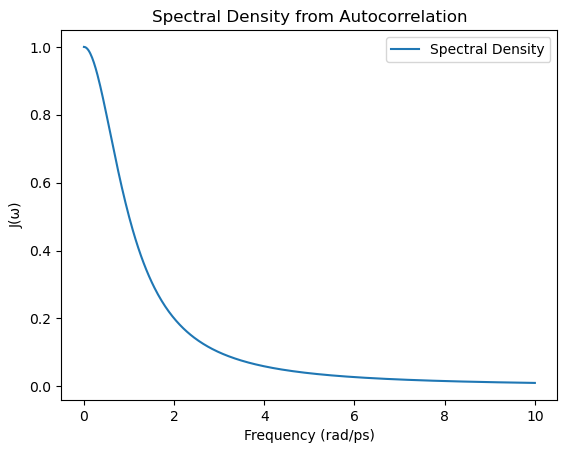

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Simulated autocorrelation function (replace with real C(t))
time = np.linspace(0, 10, 1000)  # Time points (ps)
C_t = np.exp(-time / 1.0)        # Exponential decay, example ACF

# Frequency range for spectral density
frequencies = np.linspace(0, 10, 500)  # Frequency range (rad/ps)
J_omega = []

# Compute spectral density using the Fourier relation
for omega in frequencies:
    J = np.trapz(C_t * np.cos(omega * time), time)  # Numerical integration
    J_omega.append(J)

# Plot spectral density
plt.plot(frequencies, J_omega, label="Spectral Density")
plt.xlabel("Frequency (rad/ps)")
plt.ylabel("J(ω)")
plt.legend()
plt.title("Spectral Density from Autocorrelation")
plt.show()
